<font size="5">STEP 1: Import Required Libraries</font>

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size="5">STEP 2:Load the CSV File

In [5]:

df = pd.read_csv("retail_sales_20k_transactions.csv")

In [6]:
print(df)

       Order_ID  Order_Date   Region         State         Category  \
0        100001  22-08-2023    North        Punjab         Clothing   
1        100002  14-09-2023    North         Delhi        Furniture   
2        100003  12-08-2024     East   West Bengal        Furniture   
3        100004  09-01-2024     East         Bihar        Furniture   
4        100005  20-09-2024     West     Rajasthan  Office Supplies   
...         ...         ...      ...           ...              ...   
19995    119996  21-07-2023     West       Gujarat      Electronics   
19996    119997  04-11-2024  Central  Chhattisgarh  Office Supplies   
19997    119998  27-12-2023     West       Gujarat        Furniture   
19998    119999  29-10-2023     East   West Bengal         Clothing   
19999    120000  23-12-2024    North       Haryana      Electronics   

          Product  Quantity  Cost_Price  Selling_Price  Discount_Percentage  \
0          Jacket         8     2929.94        3925.49              

<font size="5">STEP 3: Understand the Data (Very Important)

In [7]:
df.head()

,Order_ID,Order_Date,Region,State,Category,Product,Quantity,Cost_Price,Selling_Price,Discount_Percentage,Final_Price,Profit
0,100001,22-08-2023,North,Punjab,Clothing,Jacket,8,2929.94,3925.49,20,3140.39,1683.60
1,100002,14-09-2023,North,Delhi,Furniture,Sofa,6,2289.68,2635.07,0,2635.07,2072.34
2,100003,12-08-2024,East,West Bengal,Furniture,Sofa,4,2384.19,3809.60,30,2666.72,1130.12
3,100004,09-01-2024,East,Bihar,Furniture,Table,6,3763.24,5353.25,0,5353.25,9540.06
4,100005,20-09-2024,West,Rajasthan,Office Supplies,Printer,1,1366.84,1854.90,20,1483.92,117.08


In [9]:
df.shape

(20000, 12)

In [10]:
df.columns

Index(['Order_ID', 'Order_Date', 'Region', 'State', 'Category', 'Product',
       'Quantity', 'Cost_Price', 'Selling_Price', 'Discount_Percentage',
       'Final_Price', 'Profit'],
      dtype='object')

In [13]:
df.dtypes

Order_ID                 int64
Order_Date              object
Region                  object
State                   object
Category                object
Product                 object
Quantity                 int64
Cost_Price             float64
Selling_Price          float64
Discount_Percentage      int64
Final_Price            float64
Profit                 float64
dtype: object

<font size="5">STEP 4: Check Missing Values

In [14]:
df.isnull().sum()

Order_ID               0
Order_Date             0
Region                 0
State                  0
Category               0
Product                0
Quantity               0
Cost_Price             0
Selling_Price          0
Discount_Percentage    0
Final_Price            0
Profit                 0
dtype: int64

<font size="5">STEP 5: Data Cleaning 

In [16]:
# Convert Order_Date to Date Format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [17]:
df.dtypes

Order_ID                        int64
Order_Date             datetime64[ns]
Region                         object
State                          object
Category                       object
Product                        object
Quantity                        int64
Cost_Price                    float64
Selling_Price                 float64
Discount_Percentage             int64
Final_Price                   float64
Profit                        float64
dtype: object

In [18]:
#Remove rows with invalid dates
df = df.dropna(subset=['Order_Date'])

In [21]:
df.axes

[RangeIndex(start=0, stop=20000, step=1),
 Index(['Order_ID', 'Order_Date', 'Region', 'State', 'Category', 'Product',
        'Quantity', 'Cost_Price', 'Selling_Price', 'Discount_Percentage',
        'Final_Price', 'Profit'],
       dtype='object')]

In [27]:
df['Region'] = df['Region'].astype('string')
df['State'] = df['State'].astype('string')
df['Category'] = df['Category'].astype('string')
df['Product'] = df['Product'].astype('string')

In [28]:
df.dtypes

Order_ID                        int64
Order_Date             datetime64[ns]
Region                 string[python]
State                  string[python]
Category               string[python]
Product                string[python]
Quantity                        int64
Cost_Price                    float64
Selling_Price                 float64
Discount_Percentage             int64
Final_Price                   float64
Profit                        float64
dtype: object

In [31]:
# Ensure Numeric Columns Are Truly Numeric
numeric_cols = ['Quantity','Cost_Price','Selling_Price','Discount_Percentage','Final_Price','Profit']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


<font size="5">STEP 6: Feature Engineering (Creating New Useful Columns)

<font size="4">Revenue Calculation

In [33]:
df['Revenue'] = df['Final_Price'] * df['Quantity']

In [35]:
df.head()

,Order_ID,Order_Date,Region,State,Category,Product,Quantity,Cost_Price,Selling_Price,Discount_Percentage,Final_Price,Profit,Revenue
0,100001,2023-08-22,North,Punjab,Clothing,Jacket,8,2929.94,3925.49,20,3140.39,1683.60,25123.12
1,100002,2023-09-14,North,Delhi,Furniture,Sofa,6,2289.68,2635.07,0,2635.07,2072.34,15810.42
2,100003,2024-08-12,East,West Bengal,Furniture,Sofa,4,2384.19,3809.60,30,2666.72,1130.12,10666.88
3,100004,2024-01-09,East,Bihar,Furniture,Table,6,3763.24,5353.25,0,5353.25,9540.06,32119.50
4,100005,2024-09-20,West,Rajasthan,Office Supplies,Printer,1,1366.84,1854.90,20,1483.92,117.08,1483.92


<font size="4">Profit Margin

In [36]:
df['Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

In [37]:
df.head()

,Order_ID,Order_Date,Region,State,Category,Product,Quantity,Cost_Price,Selling_Price,Discount_Percentage,Final_Price,Profit,Revenue,Profit_Margin
0,100001,2023-08-22,North,Punjab,Clothing,Jacket,8,2929.94,3925.49,20,3140.39,1683.60,25123.12,6.701397
1,100002,2023-09-14,North,Delhi,Furniture,Sofa,6,2289.68,2635.07,0,2635.07,2072.34,15810.42,13.107432
2,100003,2024-08-12,East,West Bengal,Furniture,Sofa,4,2384.19,3809.60,30,2666.72,1130.12,10666.88,10.594663
3,100004,2024-01-09,East,Bihar,Furniture,Table,6,3763.24,5353.25,0,5353.25,9540.06,32119.50,29.701770
4,100005,2024-09-20,West,Rajasthan,Office Supplies,Printer,1,1366.84,1854.90,20,1483.92,117.08,1483.92,7.889913


<font size="4">Extract Month & Year

In [38]:
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

In [39]:
df.head()

,Order_ID,Order_Date,Region,State,Category,Product,Quantity,Cost_Price,Selling_Price,Discount_Percentage,Final_Price,Profit,Revenue,Profit_Margin,Month,Year
0,100001,2023-08-22,North,Punjab,Clothing,Jacket,8,2929.94,3925.49,20,3140.39,1683.60,25123.12,6.701397,8,2023
1,100002,2023-09-14,North,Delhi,Furniture,Sofa,6,2289.68,2635.07,0,2635.07,2072.34,15810.42,13.107432,9,2023
2,100003,2024-08-12,East,West Bengal,Furniture,Sofa,4,2384.19,3809.60,30,2666.72,1130.12,10666.88,10.594663,8,2024
3,100004,2024-01-09,East,Bihar,Furniture,Table,6,3763.24,5353.25,0,5353.25,9540.06,32119.50,29.701770,1,2024
4,100005,2024-09-20,West,Rajasthan,Office Supplies,Printer,1,1366.84,1854.90,20,1483.92,117.08,1483.92,7.889913,9,2024


Eda

<font size="5">STEP 7: Exploratory Data Analysis (EDA)

<font size="4">Overall Business Metrics

In [47]:
Total_revenue = df['Revenue'].sum()
Total_profit = df['Profit'].sum()
Avg_order_value = round(df['Revenue'].mean(),2)

print('Total_revenue:',Total_revenue)
print('Total_profit:', Total_profit) 
print('Avg_order_value:', Avg_order_value)


Total_revenue: 276335981.98
Total_profit: 40073643.8
Avg_order_value: 13816.8


<font size="4">Revenue by Category

In [48]:
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

Category
Furniture          56282586.44
Office Supplies    55486625.36
Home Appliances    55264260.37
Electronics        55087628.30
Clothing           54214881.51
Name: Revenue, dtype: float64

<font size="4">Profit by Region

In [49]:
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

Region
East       8376170.01
North      8271898.66
West       8016431.16
South      7868853.38
Central    7540290.59
Name: Profit, dtype: float64

<font size="4">Monthly Sales Trend

In [50]:
monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum()

In [54]:
print(monthly_sales)

Year  Month
2023  1        12487361.75
      2        11083587.21
      3        11467319.07
      4        11420648.13
      5        11863161.60
      6        10876460.20
      7        11862969.05
      8        11928142.11
      9        11634424.04
      10       11239527.48
      11       11040393.68
      12       11957822.12
2024  1        11451601.24
      2        11513641.65
      3        10926725.17
      4        12157088.34
      5        12178311.29
      6        11337112.00
      7        11121444.51
      8        11478213.45
      9        12478439.68
      10       10963292.38
      11       10628296.89
      12       11239998.94
Name: Revenue, dtype: float64


<font size="4">Discount vs Profit Analysis

In [55]:
df.groupby('Discount_Percentage')['Profit'].mean().sort_index()

Discount_Percentage
0     4081.395450
5     3295.174046
10    2577.464159
15    1800.951224
20     934.933542
30    -681.313845
Name: Profit, dtype: float64

<font size="5">STEP 8: Simple Visual EDA

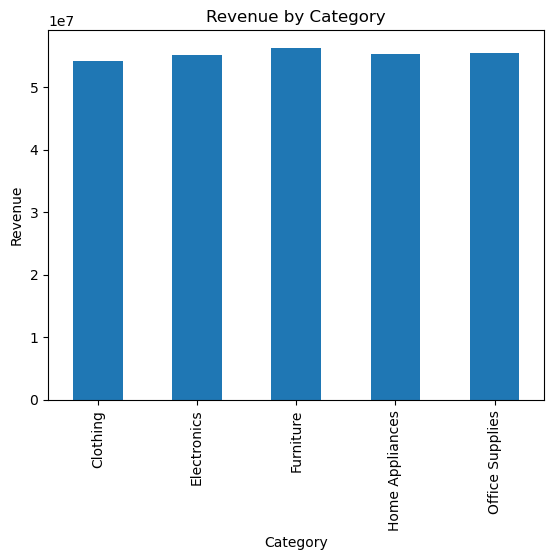

In [56]:
df.groupby('Category')['Revenue'].sum().plot(kind='bar')
plt.title("Revenue by Category")
plt.ylabel("Revenue")
plt.show()


<font size="5">STEP 9: Final Clean Dataset Check

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_ID             20000 non-null  int64         
 1   Order_Date           20000 non-null  datetime64[ns]
 2   Region               20000 non-null  string        
 3   State                20000 non-null  string        
 4   Category             20000 non-null  string        
 5   Product              20000 non-null  string        
 6   Quantity             20000 non-null  int64         
 7   Cost_Price           20000 non-null  float64       
 8   Selling_Price        20000 non-null  float64       
 9   Discount_Percentage  20000 non-null  int64         
 10  Final_Price          20000 non-null  float64       
 11  Profit               20000 non-null  float64       
 12  Revenue              20000 non-null  float64       
 13  Profit_Margin        20000 non-

<font size="5">STEP 10: Export Clean Data for SQL

In [59]:
df.to_csv("retail_sales_cleaned_for_sql.csv", index=False)

In [60]:
df = pd.read_csv("retail_sales_cleaned_for_sql.csv")

In [61]:
df.head()

,Order_ID,Order_Date,Region,State,Category,Product,Quantity,Cost_Price,Selling_Price,Discount_Percentage,Final_Price,Profit,Revenue,Profit_Margin,Month,Year
0,100001,2023-08-22,North,Punjab,Clothing,Jacket,8,2929.94,3925.49,20,3140.39,1683.60,25123.12,6.701397,8,2023
1,100002,2023-09-14,North,Delhi,Furniture,Sofa,6,2289.68,2635.07,0,2635.07,2072.34,15810.42,13.107432,9,2023
2,100003,2024-08-12,East,West Bengal,Furniture,Sofa,4,2384.19,3809.60,30,2666.72,1130.12,10666.88,10.594663,8,2024
3,100004,2024-01-09,East,Bihar,Furniture,Table,6,3763.24,5353.25,0,5353.25,9540.06,32119.50,29.701770,1,2024
4,100005,2024-09-20,West,Rajasthan,Office Supplies,Printer,1,1366.84,1854.90,20,1483.92,117.08,1483.92,7.889913,9,2024
